In [13]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

In [14]:
#Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
#Initializing Parameters
def initialize_parameters():
    W1 = np.random.randn(2,2)
    W2 = np.random.randn(1,2)
    b1 = np.zeros((2,1))
    b2 = np.zeros((1,1))
    return W1, W2, b1, b2

In [16]:
#Defining The Loss function
def binary_cross_entropy(a2, y):
    m = y.shape[0]
    return -np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))/m

In [17]:
def forwardpropagation(x, y, w1, w2, b1, b2):
    #First Layer
    z1 = w1@x + b1
    a1 = sigmoid(z1)

    #Second Layer
    z2 = w2@a1 + b2
    a2 = sigmoid(z2)

    loss = binary_cross_entropy(a2, y)

    return loss, a2, a1, z2, z1

In [18]:
#Calculating Gradients Using Chain Rule
def calculate_gradients(x, y, w1, w2, b1, b2, a2, a1, z2, z1):
    m = y.shape[0]
    dL_dz2 = a2 - y
    dL_dw2 = dL_dz2 @ a1.T / m
    dL_db2 = np.sum(dL_dz2, axis = 1, keepdims = True)

    dL_da1 = w2.T @ dL_dz2
    dL_dz1 = dL_da1 * a1 * (1-a1)
    dL_dw1 = dL_dz1 @ x.T / m
    dL_db1 = np.sum(dL_dz1, axis = 1, keepdims = True)/m

    return dL_dw2, dL_db2, dL_dw1, dL_db1

In [19]:
#XOR Data
X = np.array([[1, 1, 0, 0], 
              [0, 1, 0, 1]])
y = np.array([[0, 1, 1, 0]])

In [20]:
w1, w2, b1, b2 = initialize_parameters()

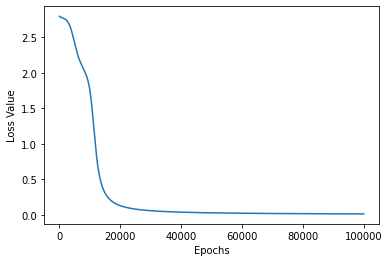

In [21]:
#Backward Propagation
losses = []
lr = 0.01
epoch = 100000

for i in range(epoch):
    #Forward Propagation and Loss Calculation
    loss, a2, a1, z2, z1 = forwardpropagation(X, y, w1, w2, b1, b2)
    losses.append(loss)

    #Calculating Gradients
    dL_dw2, dL_db2, dL_dw1, dL_db1 = calculate_gradients(X, y, w1, w2, b1, b2, a2, a1, z2, z1)

    #Update Parameters
    w1 -= lr * dL_dw1
    w2 -= lr * dL_dw2
    b1 -= lr * dL_db1
    b2 -= lr * dL_db2

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

In [22]:
loss, a2, a1, z2, z1 = forwardpropagation(X, y, w1, w2, b1, b2)

In [23]:
#Prediction
(a2 > 0.5).astype(int)

array([[0, 1, 1, 0]])

In [24]:
#Actual
y

array([[0, 1, 1, 0]])